In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [4]:
import data

In [5]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.


In [6]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

Dropping 35 dupe results.


In [7]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [8]:
# Convert condition_id to independent features
response_df["agent_is_given"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"] == 1

In [9]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [10]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [11]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,survey_question_idx,survey_answer,slider_value,slider_copout,condition_0,condition_1,condition_2,agent_is_given,agent_is_subject,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,11532.0,0.0-3.0,2021-08-23 19:33:33.192,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,solid,full,False,False,NaN
4,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,6128.0,0.0-4.0,2021-08-23 19:33:39.325,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,liquid,full,False,False,NaN
5,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,7564.0,0.0-5.0,2021-08-23 19:33:46.893,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,abstract,empty,False,False,NaN
6,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,9300.0,0.0-6.0,2021-08-23 19:33:56.197,04_comprehension_swarm-full,...,<NA>,NaN,87.0,False,practice,solid,empty,False,False,0.751921
7,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,4540.0,0.0-7.0,2021-08-23 19:34:00.742,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,abstract,full,False,False,NaN


In [12]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [13]:
N = len(response_df.reset_index().uniqueid.unique())
N

72

### Demo

In [14]:
# again hack -- forgot to put in experiment_id
qualitative_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

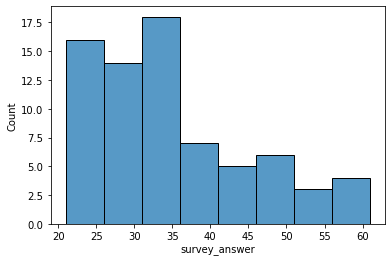

In [15]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [16]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    45
Master's degree      18
Some college          9
High school/GED       1
Name: survey_answer, dtype: int64

In [17]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    72
No      1
Name: survey_answer, dtype: int64

### Comments

In [18]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer)

['nice',
 'None',
 '',
 'GOOD',
 '',
 '',
 '',
 '',
 '',
 'very goods',
 'very interesting',
 'nice',
 'No',
 'good job',
 'No.',
 'very well',
 '',
 '',
 'NICE',
 'Good and easy task',
 'It was a good survey.',
 'good',
 'This was a fascinating and enjoyable study.',
 'This survey is good and usefull me',
 '',
 'very like the survey',
 'none',
 'GOOD',
 'Interested',
 'This survey is very nice and very good ',
 'Good task and good study.',
 '',
 'very interesting',
 'none',
 'nothing',
 '',
 'cool hit!',
 'nothing',
 'good',
 'nice.',
 'LIKE IT',
 'good study',
 'very nice study',
 'none',
 'none',
 '',
 'none',
 '',
 'na',
 'good',
 'LIKE IT',
 '',
 'very interesting',
 'Good experiment',
 '',
 '',
 'It was good',
 '',
 '',
 'Enjoyed the survey.',
 '',
 '',
 '',
 'noe',
 '',
 'nice survey',
 'none',
 'None',
 'None',
 '',
 "I'm brimming with gratitude.  ",
 '',
 'No']

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

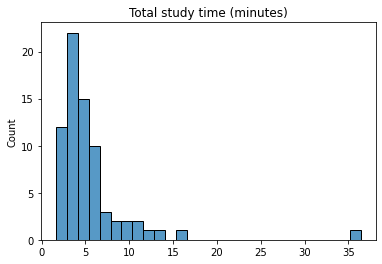

In [19]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [20]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.485056
std     4.614171
Name: rt, dtype: float64

### Response times

In [21]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

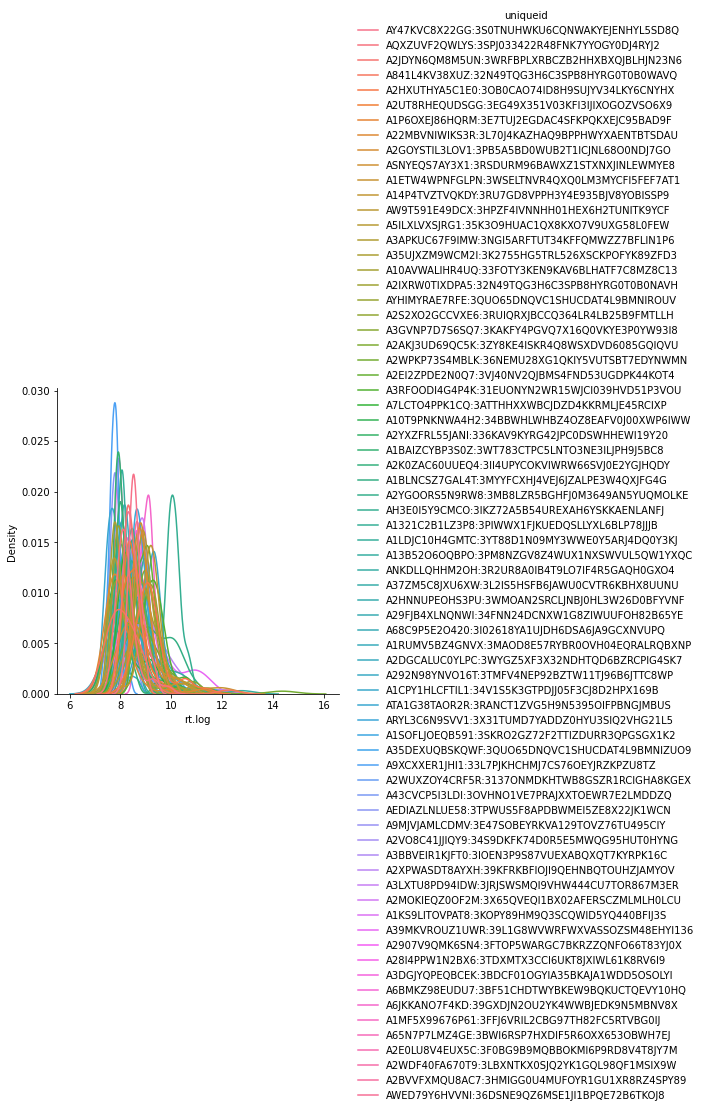

In [22]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

Text(0.5, 1.0, 'Log response time vs. trial position')

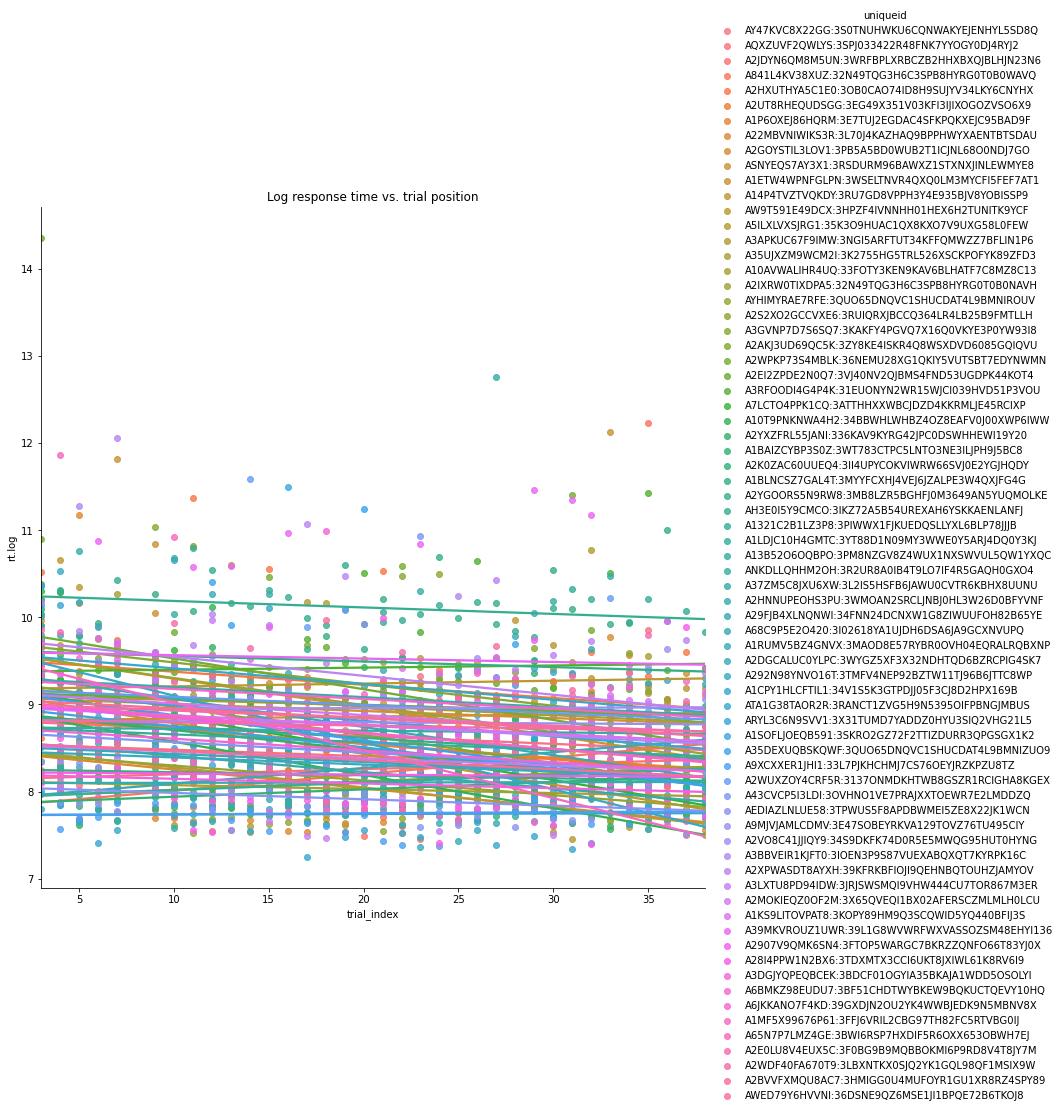

In [23]:
sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

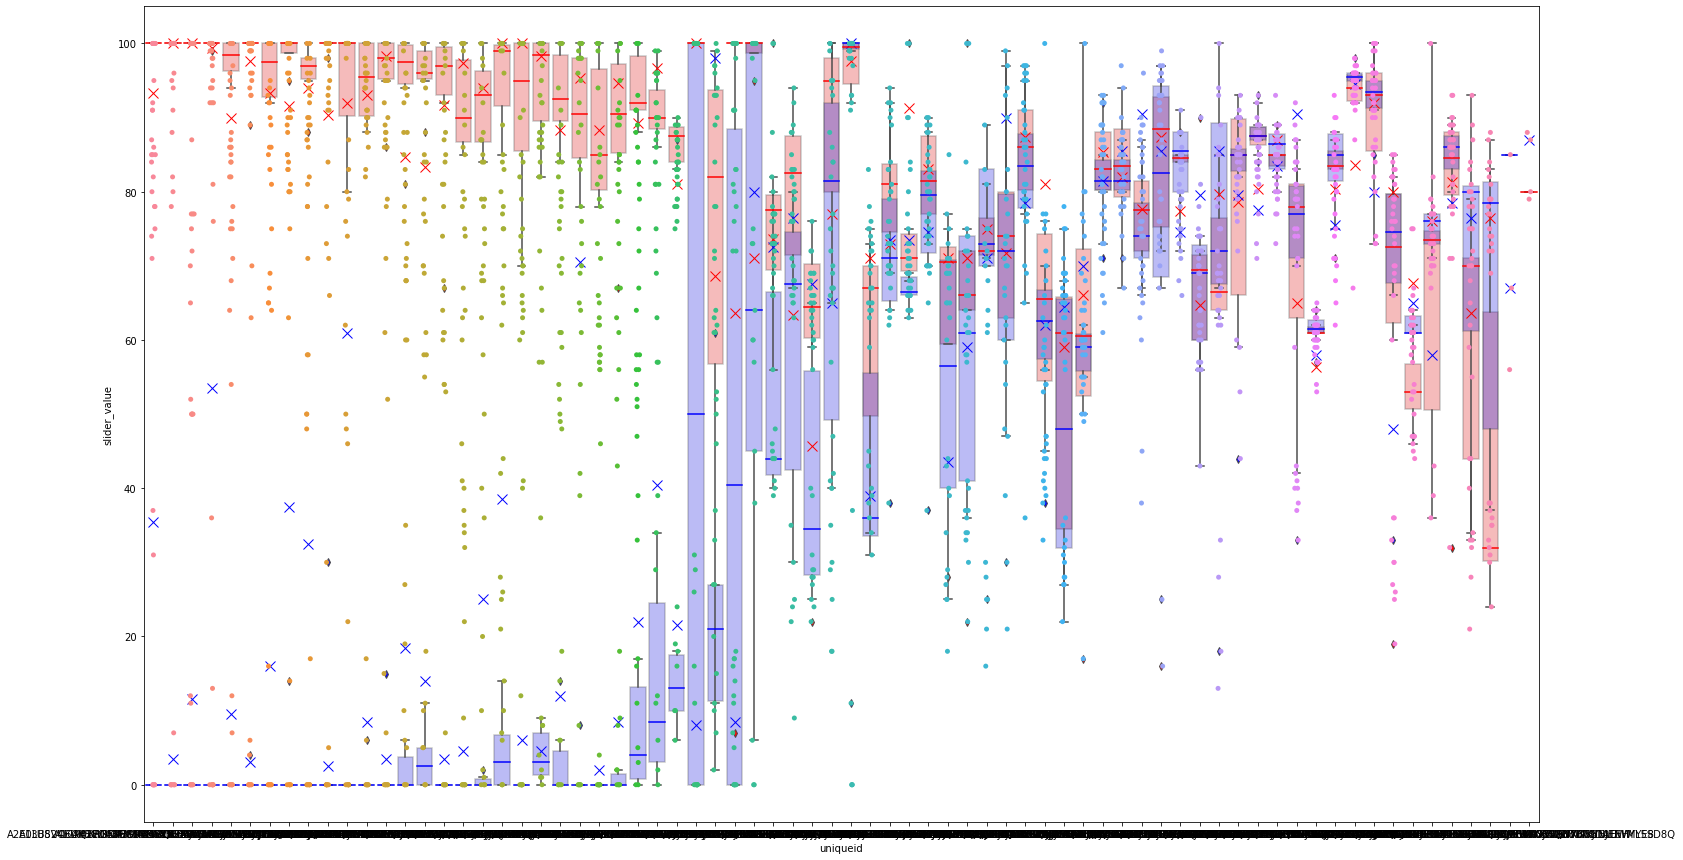

In [24]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(25, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [25]:
practice_df = response_df[response_df.condition_0 == "practice"]
practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)

<ipython-input-25-380d923c644c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
<ipython-input-25-380d923c644c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)


In [26]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = {"solidempty"}

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [27]:
practice_df.groupby("practice_id").match.mean()

practice_id
abstractempty    0.458333
abstractfull     0.805556
liquidfull       0.930556
solidfull        0.930556
Name: match, dtype: float64

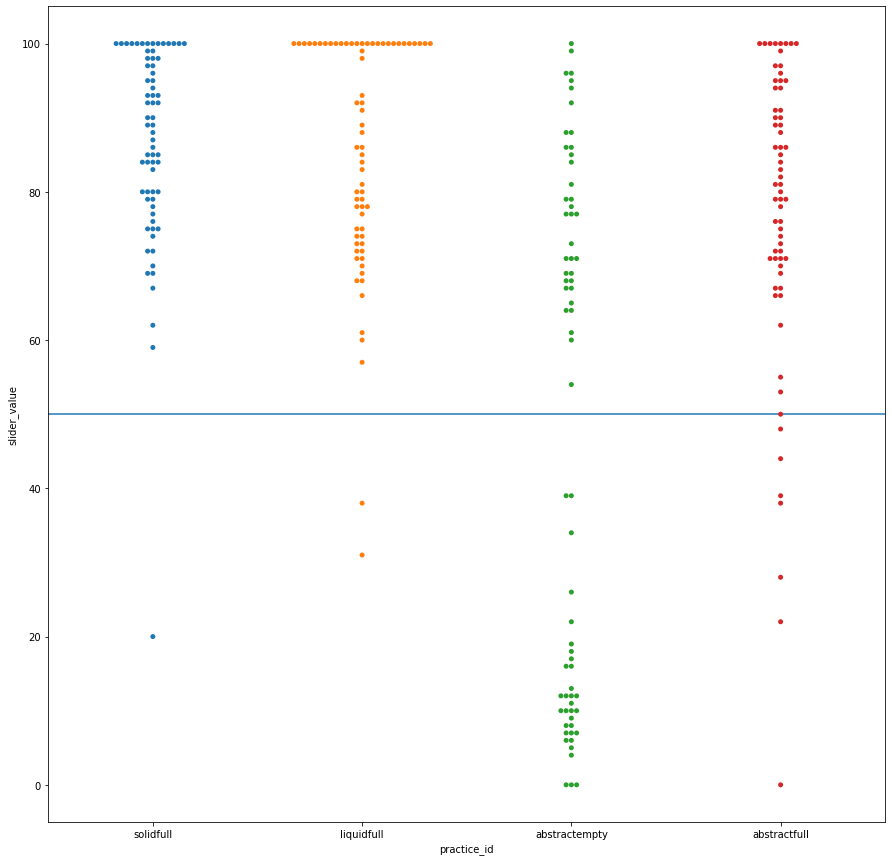

In [28]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [29]:
practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
abstractfull,0.083333,72
solidfull,0.055556,72
abstractempty,0.041667,72
liquidfull,0.041667,72


### Fillers

<AxesSubplot:xlabel='t'>

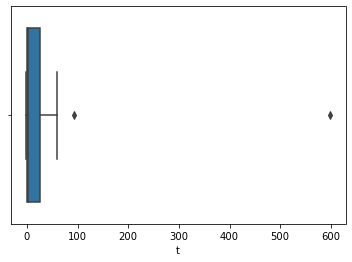

In [30]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [31]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
A2MOKIEQZ0OF2M:3X65QVEQI1BX02AFERSCZMLMLH0LCU,-2.015044,7.156987e-02
A10T9PNKNWA4H2:34BBWHLWHBZ4OZ8EAFV0J00XWP6IWW,-1.720933,1.159980e-01
A5ILXLVXSJRG1:35K3O9HUAC1QX8KXO7V9UXG58L0FEW,-1.381426,1.972313e-01
A37ZM5C8JXU6XW:3L2IS5HSFB6JAWU0CVTR6KBHX8UUNU,-1.005735,3.382585e-01
A22MBVNIWIKS3R:3L70J4KAZHAQ9BPPHWYXAENTBTSDAU,-0.876703,4.034415e-01
A28I4PPW1N2BX6:3TDXMTX3CCI6UKT8JXIWL61K8RV6I9,-0.752071,4.693401e-01
A2K0ZAC60UUEQ4:3II4UPYCOKVIWRW66SVJ0E2YGJHQDY,-0.745421,4.750336e-01
AYHIMYRAE7RFE:3QUO65DNQVC1SHUCDAT4L9BMNIROUV,-0.694988,5.028914e-01
A35UJXZM9WCM2I:3K2755HG5TRL526XSCKPOFYK89ZFD3,-0.422577,6.815463e-01


#### Filler copouts

In [32]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
3.0,empty,0.069444,5,72
5.0,empty,0.055556,4,72
6.0,full,0.055556,4,72
7.0,full,0.055556,4,72
8.0,full,0.055556,4,72
10.0,full,0.055556,4,72
11.0,full,0.055556,4,72
0.0,empty,0.041667,3,72
1.0,empty,0.041667,3,72


#### Filler failures by item

In [33]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

<ipython-input-33-5f9f2f07b75b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [34]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        0.541667
             1.0        0.500000
             2.0        0.458333
             3.0        0.500000
             4.0        0.486111
             5.0        0.513889
full         6.0        0.875000
             7.0        0.861111
             8.0        0.888889
             9.0        0.916667
             10.0       0.875000
             11.0       0.875000
Name: match, dtype: float64

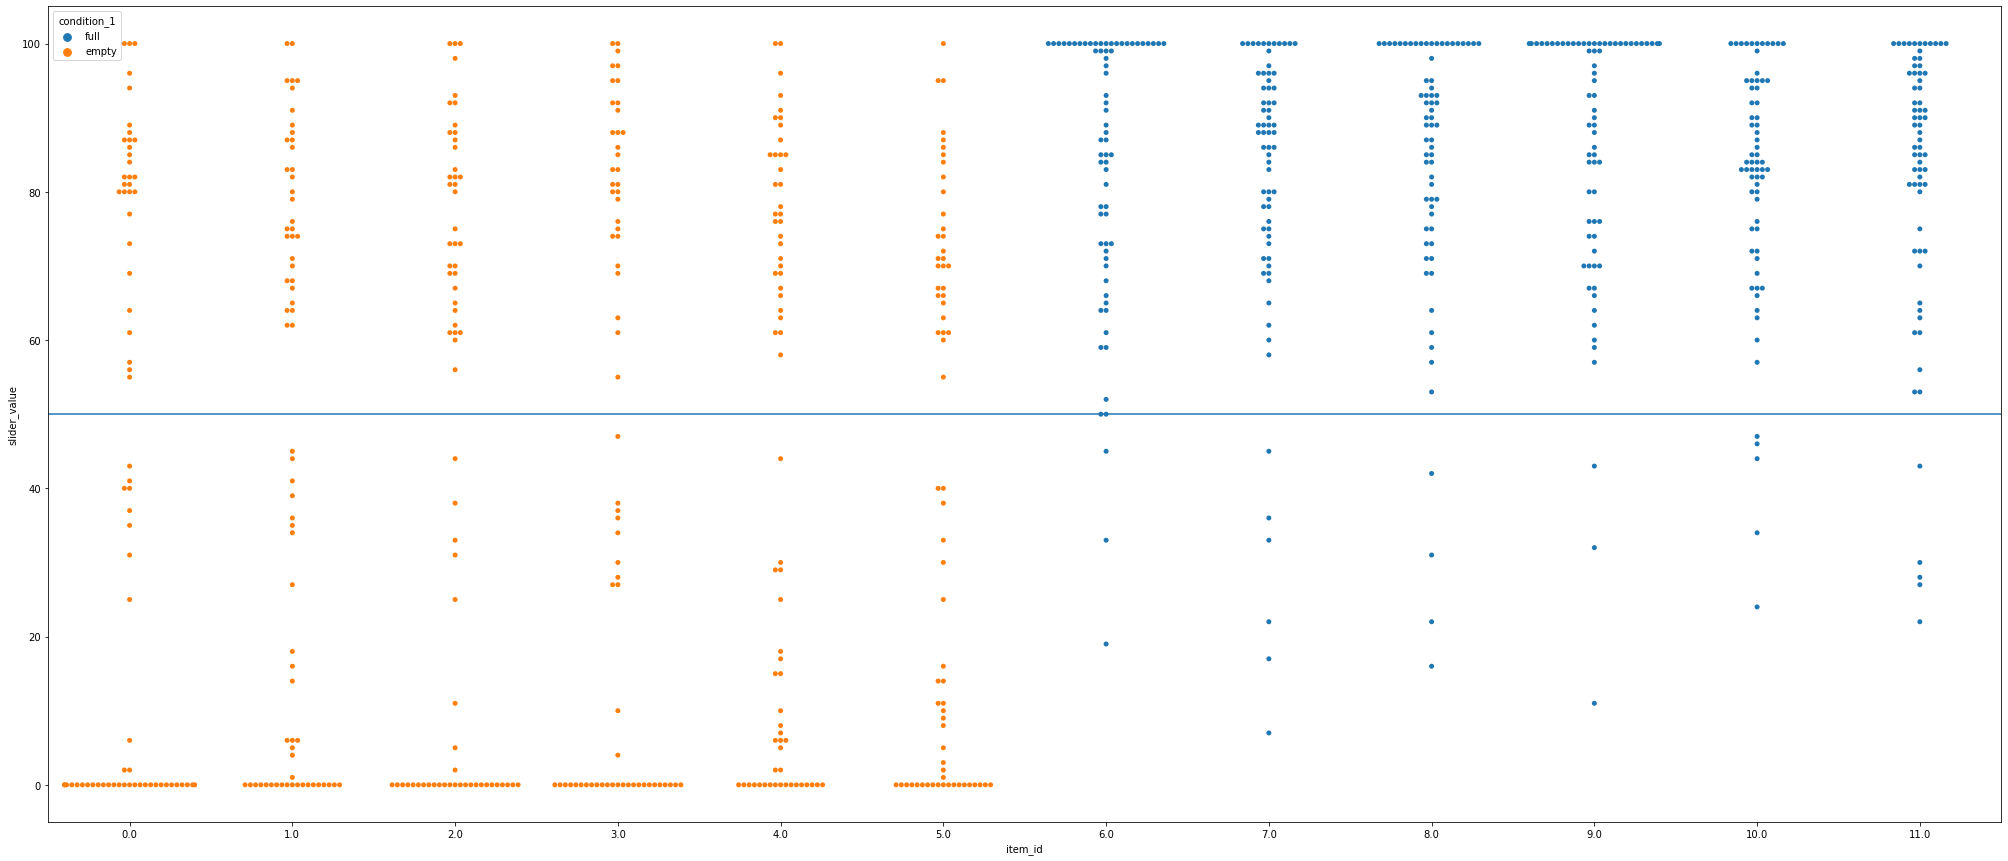

In [35]:
plt.subplots(figsize=(35,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [36]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [37]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.75).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / N * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

14 subjects (19.4%) disqualified and dropped due to failed practice.
	A2YXZFRL55JANI:336KAV9KYRG42JPC0DSWHHEWI19Y20
	A2AKJ3UD69QC5K:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU
	A5ILXLVXSJRG1:35K3O9HUAC1QX8KXO7V9UXG58L0FEW
	A35DEXUQBSKQWF:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9
	A14P4TVZTVQKDY:3RU7GD8VPPH3Y4E935BJV8YOBISSP9
	A2UT8RHEQUDSGG:3EG49X351V03KFI3IJIXOGOZVSO6X9
	AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q
	A29FJB4XLNQNWI:34FNN24DCNXW1G8ZIWUUFOH82B65YE
	A3GVNP7D7S6SQ7:3KAKFY4PGVQ7X16Q0VKYE3P0YW93I8
	A2HNNUPEOHS3PU:3WMOAN2SRCLJNBJ0HL3W26D0BFYVNF
	A292N98YNVO16T:3TMFV4NEP92BZTW11TJ96B6JTTC8WP
	ASNYEQS7AY3X1:3RSDURM96BAWXZ1STXNXJINLEWMYE8
	A22MBVNIWIKS3R:3L70J4KAZHAQ9BPPHWYXAENTBTSDAU
	A2S2XO2GCCVXE6:3RUIQRXJBCCQ364LR4LB25B9FMTLLH
40 subjects (55.6%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A10T9PNKNWA4H2:34BBWHLWHBZ4OZ8EAFV0J00XWP6IWW
	A1321C2B1LZ3P8:3PIWWX1FJKUEDQSLLYXL6BLP78JJJB
	A14P4TVZTVQKDY:3RU7GD8VPPH3Y4E935BJV8YOBISSP9
	A1BAIZCYBP3S0Z:3WT783

In [38]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

29 subjects remaining.


### Merge in materials

In [39]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [40]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [41]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, swarm-004-given.


### Export

In [42]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [43]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

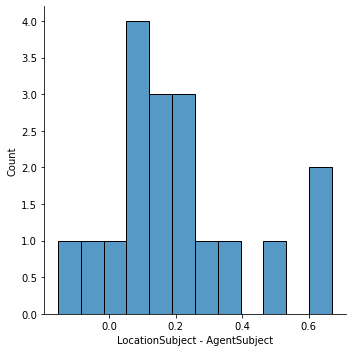

In [44]:
sns.displot(item_differences, bins=12)

In [45]:
item_differences.sort_values(ascending=False)

item_id  A             V        L           A concrete?  A countable?
56.0     tadpoles      swimm    pond        True         True            0.670247
64.0     worms         wriggl   bucket      True         True            0.651384
24.0     frogs         hopp     swamp       True         True            0.469853
18.0     birds         flutter  courtyard   True         True            0.362940
19.0     bubbles       foam     tub         True         True            0.283386
30.0     fear          prickl   fingertips  False        False           0.247057
20.0     fireflies     glimmer  backyard    True         True            0.209342
8.0      cockroaches   creep    cave        True         True            0.199736
39.0     sewage        runn     street      True         False           0.166022
22.0     lights        glow     sky         True         True            0.145499
25.0     energy        humm     market      False        False           0.121311
17.0     debris        flow 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'cockroaches creep'),
  Text(1, 0, 'sewage runn'),
  Text(2, 0, 'frogs hopp'),
  Text(3, 0, 'fireflies glimmer'),
  Text(4, 0, 'birds flutter'),
  Text(5, 0, 'worms wriggl'),
  Text(6, 0, 'lights glow'),
  Text(7, 0, 'terror cours'),
  Text(8, 0, 'bubbles foam'),
  Text(9, 0, 'excitement puls'),
  Text(10, 0, 'tadpoles swimm'),
  Text(11, 0, 'debris flow'),
  Text(12, 0, 'excitement crackl'),
  Text(13, 0, 'trepidation shak'),
  Text(14, 0, 'people bustl'),
  Text(15, 0, 'fear prickl'),
  Text(16, 0, 'anticipation tingl'),
  Text(17, 0, 'energy humm')])

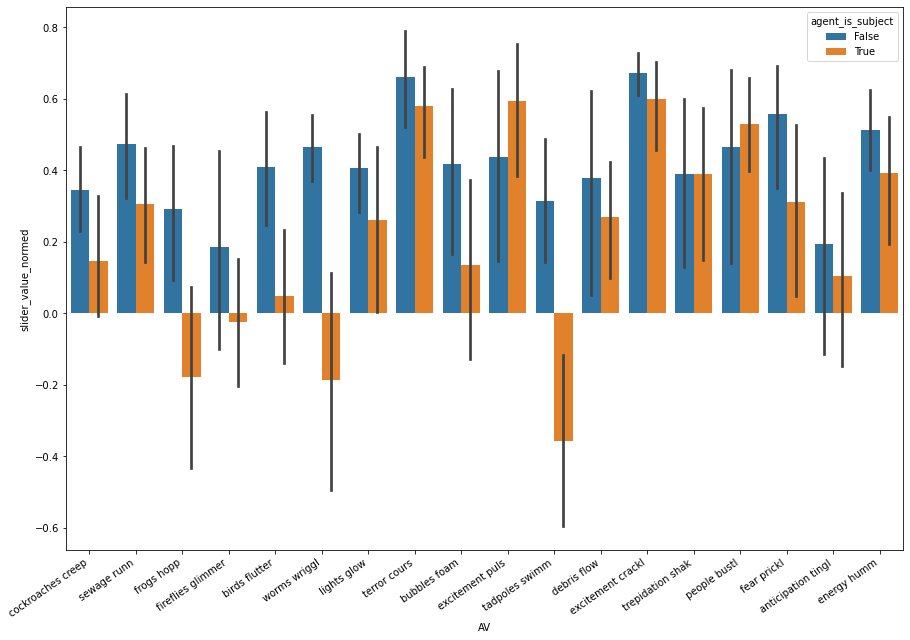

In [46]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="AV", hue="agent_is_subject", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

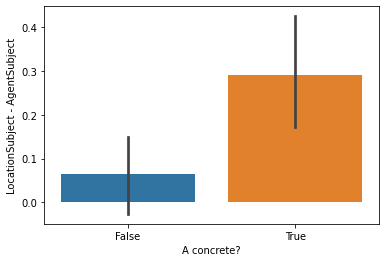

In [47]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

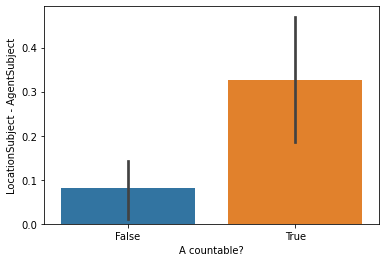

In [48]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

#### Bootstrap check

In [73]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.025, 0.975])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

# item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
# item_bootstrap_df

In [74]:
# item_bootstrap_df = \
#     pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
#              left_index=True, right_index=True).sort_values("low", ascending=False)

In [75]:
# item_bootstrap_df.sort_values("low", ascending=False)

In [76]:
# plt.subplots(figsize=(15, 15))
# sns.barplot(
#     data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
#     x="AV", y="value", hue="variable")
# plt.xticks(rotation=35, ha="right")

### Copouts

In [53]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [54]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_given", "agent_is_subject"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "agent_is_given", "agent_is_subject"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

slider_copout                            sum  count      mean
item_id agent_is_given agent_is_subject                      
8.0     False          False               1      5  0.200000
30.0    False          True                1      6  0.166667
22.0    False          True                1      7  0.142857
20.0    True           True                1     10  0.100000
25.0    True           False               1     11  0.090909
...                                      ...    ...       ...
20.0    True           False               0      8  0.000000
22.0    False          False               0      7  0.000000
        True           False               0      5  0.000000
                       True                0     10  0.000000
64.0    True           True                0      6  0.000000

[72 rows x 3 columns]

<AxesSubplot:xlabel='A', ylabel='slider_copout'>

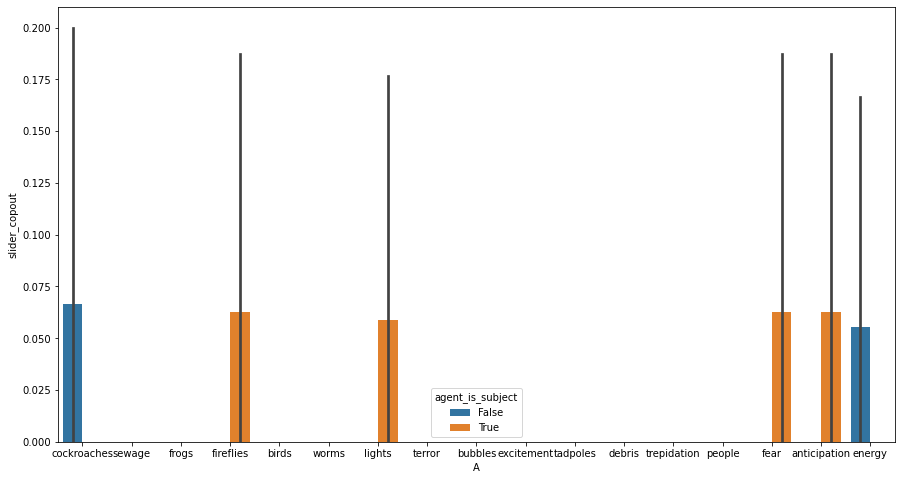

In [55]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="A", y="slider_copout", hue="agent_is_subject")

<AxesSubplot:xlabel='A concrete?', ylabel='slider_copout'>

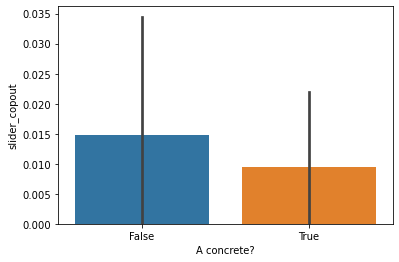

In [56]:
sns.barplot(data=merged_df, x="A concrete?", y="slider_copout")

<AxesSubplot:xlabel='A countable?', ylabel='slider_copout'>

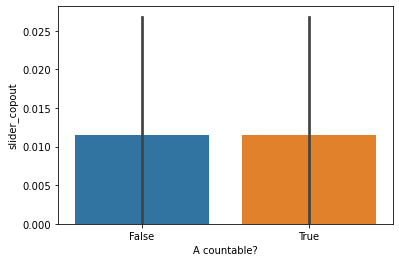

In [57]:
sns.barplot(data=merged_df, x="A countable?", y="slider_copout")

## Item exposure

In [58]:
merged_df.groupby(["item_id", "A", "agent_is_given", "agent_is_subject"]).size().sort_values().head(20)

item_id  A             agent_is_given  agent_is_subject
17.0     debris        False           False               1
58.0     anticipation  True            True                2
18.0     birds         True            False               3
4.0      people        True            False               4
                                       True                4
39.0     sewage        False           False               4
31.0     excitement    True            True                4
58.0     anticipation  True            False               4
8.0      cockroaches   False           False               5
18.0     birds         False           False               5
8.0      cockroaches   True            True                5
24.0     frogs         False           False               5
25.0     energy        False           True                5
41.0     trepidation   False           True                5
56.0     tadpoles      False           True                5
31.0     excitement    True  

## Basic visualization: givenness manipulation

In [59]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "AV", "A concrete?", "A countable?", "agent_is_given"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

In [60]:
item_differences.sort_values()

item_id  A             V        L           AV                  A concrete?  A countable?  agent_is_given
17.0     debris        flow     river       debris flow         True         False         False            -1.737453
58.0     anticipation  tingl    arms        anticipation tingl  False        False         True             -0.382398
41.0     trepidation   shak     chest       trepidation shak    False        False         False            -0.375568
31.0     excitement    puls     temples     excitement puls     False        False         False            -0.224061
30.0     fear          prickl   fingertips  fear prickl         False        False         False            -0.127618
6.0      terror        cours    body        terror cours        False        False         True             -0.092255
7.0      excitement    crackl   theater     excitement crackl   False        False         False            -0.084040
4.0      people        bustl    square      people bustl        True

<AxesSubplot:xlabel='agent_is_given', ylabel='LocationSubject - AgentSubject'>

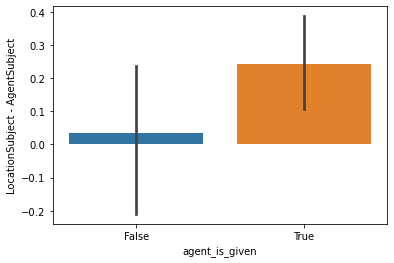

In [79]:
sns.barplot(data=item_differences.reset_index(), x="agent_is_given", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

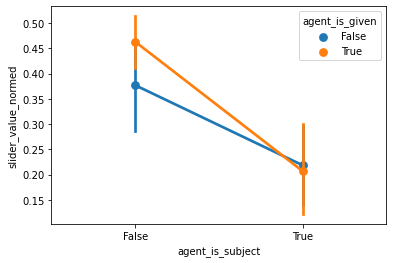

In [61]:
sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

In [67]:
ttest_ind(merged_df[merged_df.agent_is_given & ~merged_df.agent_is_subject & ~merged_df.slider_copout].slider_value_normed,
          merged_df[~merged_df.agent_is_given & ~merged_df.agent_is_subject & ~merged_df.slider_copout].slider_value_normed)

Ttest_indResult(statistic=1.6555783691949417, pvalue=0.09905196377898182)

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

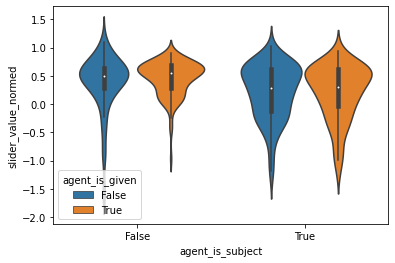

In [62]:
sns.violinplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

### Split by concreteness

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

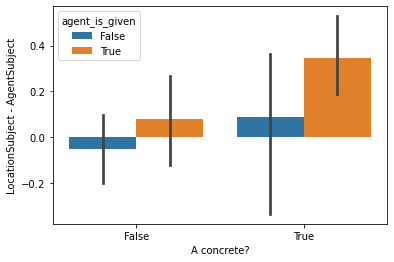

In [85]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject", hue="agent_is_given")

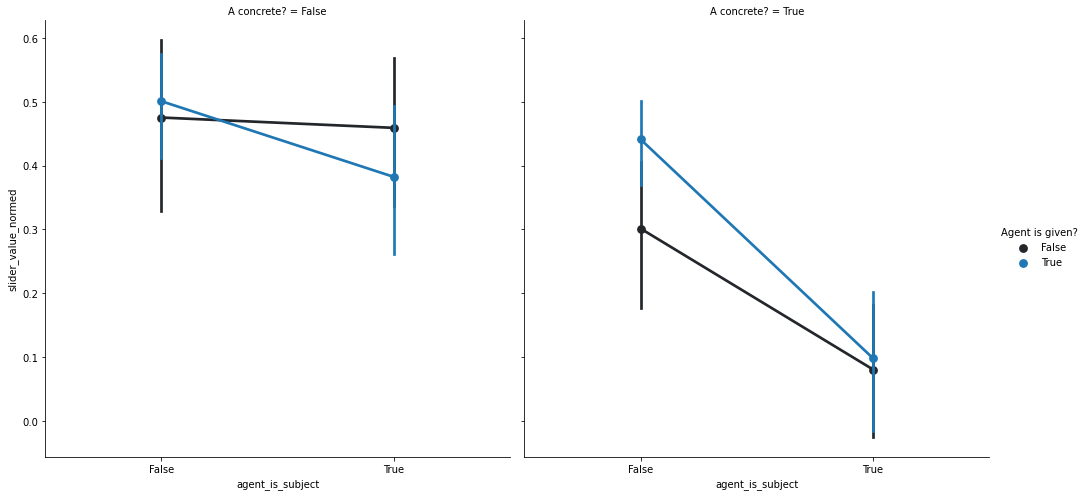

In [71]:
g = sns.FacetGrid(data=merged_df.reset_index(), col="A concrete?", height=7)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True]).add_legend(title="Agent is given?")

In [72]:
merged_df.groupby("A concrete?").apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed))

A concrete?
False    (0.30992218985898856, 0.7572650615343677)
True      (2.109371612971563, 0.03657318112556101)
dtype: object

### Split by item

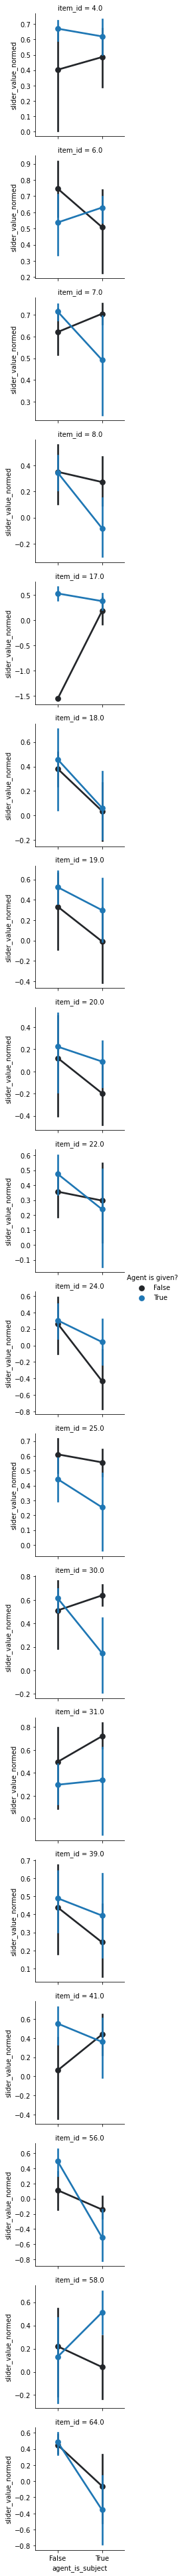

In [63]:
g = sns.FacetGrid(data=merged_df.reset_index(), row="item_id", sharey=False)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True])
g.add_legend(title="Agent is given?")
# sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

## Extras

In [64]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

KeyError: 'A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX'

In [ ]:
exp_items[(exp_items.condition_0 != "filler") & (exp_items.item_id == 3)][["agent_is_subject", "slider_value_normed"]].sort_values(["agent_is_subject", "slider_value_normed"])